In [25]:
import os 
from pathlib import Path
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Set seaborn style for all plots
sns.set_style("whitegrid")
sns.set_palette("Set2")

In [33]:
BASE_DIR = Path('G:/spatial_data')
analysis_dir = BASE_DIR / 'analysis' / '20250727_PRISM_NBT_revision_subcellular_validation'

run_ids = [
    '20230704_PRISM3D_mousebrain_CTX_confocal', 
    # '20230705_PRISM3D_mousebrain_HT_confocal', 
    # '20230706_PRISM3D_mousebrain_TH_confocal', 
    '20230710_PRISM3D_mousebrain_HP_confocal'
]

In [35]:
# 用于存储所有run_id的结果
all_plp1_stats = []

for RUN_ID in tqdm(run_ids, desc="Processing tissues"):
    # processed dir
    process_dir = BASE_DIR / 'processed' / RUN_ID
    read_dir = process_dir / 'readout'
    seg_dir = process_dir / 'segmented'
    cell_typ_dir = process_dir / "celltyping"
    subcel_dir = process_dir / 'subcellular'
    
    # load data
    rna_df = pd.read_csv(read_dir/'mapped_genes.csv', index_col=0, low_memory=False)
    cell_info = pd.read_csv(cell_typ_dir/'cell_info.csv', index_col=0)
    oligo_cells = cell_info[cell_info['subtype'] == 'Glial-Oligodendrocyte']
    
    print(f"\n处理 {RUN_ID}")
    print(f"总共oligodendrocyte细胞数: {len(oligo_cells)}")
    
    # 筛选plp1基因的RNA点
    plp1_rna = rna_df[rna_df['Gene'] == 'Plp1']
    print(f"总共Plp1 RNA点数: {len(plp1_rna)}")
    
    # 根据oligo_cells的index找到对应的plp1 RNA点
    oligo_cell_indices = oligo_cells.index.tolist()
    plp1_in_oligo = plp1_rna[plp1_rna['Cell Index'].isin(oligo_cell_indices)]
    print(f"oligo细胞中的Plp1 RNA点数: {len(plp1_in_oligo)}")
    
    # 统计每个细胞的in_nu和out_nu数目
    cell_plp1_stats = []
    
    for cell_id in oligo_cell_indices:
        cell_plp1_data = plp1_in_oligo[plp1_in_oligo['Cell Index'] == cell_id]
        
        if len(cell_plp1_data) > 0:  # 该细胞有plp1 RNA点
            # 计算in_nu和out_nu数目
            in_nu_count = len(cell_plp1_data[cell_plp1_data['in_nu'] == True])
            out_nu_count = len(cell_plp1_data[cell_plp1_data['in_nu'] == False])
            total_count = len(cell_plp1_data)
            
            # 计算核内RNA比例 in/(in+out)
            if total_count > 0:
                in_nuclear_ratio = in_nu_count / total_count
            else:
                in_nuclear_ratio = np.nan  # 排除无RNA的情况
            
            cell_plp1_stats.append({
                'run_id': RUN_ID,
                'Cell Index': cell_id,
                'in_nu_count': in_nu_count,
                'out_nu_count': out_nu_count,
                'total_count': total_count,
                'in_nuclear_ratio': in_nuclear_ratio
            })
    
    print(f"有Plp1表达的oligo细胞数: {len(cell_plp1_stats)}")
    all_plp1_stats.extend(cell_plp1_stats)

# 转换为DataFrame
plp1_stats_df = pd.DataFrame(all_plp1_stats)
print(f"\n总共分析的细胞数: {len(plp1_stats_df)}")
print(plp1_stats_df.head())


Processing tissues:  50%|█████     | 1/2 [00:00<00:00,  3.14it/s]


处理 20230704_PRISM3D_mousebrain_CTX_confocal
总共oligodendrocyte细胞数: 258
总共Plp1 RNA点数: 1805
oligo细胞中的Plp1 RNA点数: 616
有Plp1表达的oligo细胞数: 247

处理 20230710_PRISM3D_mousebrain_HP_confocal
总共oligodendrocyte细胞数: 1724
总共Plp1 RNA点数: 9276
oligo细胞中的Plp1 RNA点数: 2951


Processing tissues: 100%|██████████| 2/2 [00:01<00:00,  1.25it/s]

有Plp1表达的oligo细胞数: 1192

总共分析的细胞数: 1439
                                     run_id  Cell Index  in_nu_count  \
0  20230704_PRISM3D_mousebrain_CTX_confocal          28            0   
1  20230704_PRISM3D_mousebrain_CTX_confocal          79            1   
2  20230704_PRISM3D_mousebrain_CTX_confocal          85            0   
3  20230704_PRISM3D_mousebrain_CTX_confocal         107            0   
4  20230704_PRISM3D_mousebrain_CTX_confocal         111            0   

   out_nu_count  total_count  in_nuclear_ratio  
0             1            1          0.000000  
1             2            3          0.333333  
2             2            2          0.000000  
3             1            1          0.000000  
4             2            2          0.000000  


C:\Users\Mingchuan\AppData\Local\Temp\ipykernel_141304\1207579783.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=plot_df, x='Brain_Region', y='Nuclear_Ratio',
C:\Users\Mingchuan\AppData\Local\Temp\ipykernel_141304\1207579783.py:39: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([f'CTX\n(n={len(plot_df[plot_df["Brain_Region"]=="CTX"])})',


CTX Statistics:
  Mean: 0.411
  Median: 0.333
  Std: 0.416
  Min: 0.000
  Max: 1.000

HP Statistics:
  Mean: 0.542
  Median: 0.500
  Std: 0.401
  Min: 0.000
  Max: 1.000



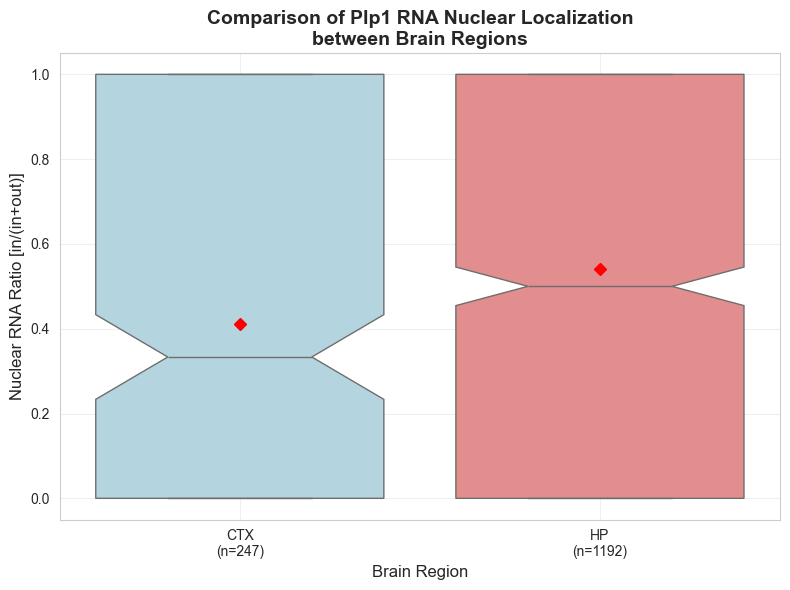

Mann-Whitney U test:
  Statistic: 120838.0
  P-value: 0.000004

Two-sample t-test:
  T-statistic: -4.6490
  P-value: 0.000004

Significance level: ***
(* p<0.05, ** p<0.01, *** p<0.001, ns = not significant)


In [36]:
# Create boxplot comparing nuclear ratio between two run_ids using seaborn
# Prepare data for seaborn boxplot - exclude NaN values
plot_data = []

for run_id in unique_run_ids:
    # Get data for current run_id
    current_data = plp1_stats_df[plp1_stats_df['run_id'] == run_id]
    valid_ratios = current_data['in_nuclear_ratio'][np.isfinite(current_data['in_nuclear_ratio'])]
    
    # Create simplified label
    run_name = run_id.replace('20230704_PRISM3D_mousebrain_CTX_confocal', 'CTX')
    run_name = run_name.replace('20230710_PRISM3D_mousebrain_HP_confocal', 'HP')
    
    # Add data for each cell
    for ratio in valid_ratios:
        plot_data.append({
            'Brain_Region': run_name,
            'Nuclear_Ratio': ratio,
            'Sample_Size': f'{run_name} (n={len(valid_ratios)})'
        })

# Convert to DataFrame for seaborn
plot_df = pd.DataFrame(plot_data)

# Create the plot
plt.figure(figsize=(8, 6))
ax = sns.boxplot(data=plot_df, x='Brain_Region', y='Nuclear_Ratio', 
                 palette=['lightblue', 'lightcoral'],
                 notch=True, showmeans=True, 
                 meanprops={'marker': 'D', 'markerfacecolor': 'red', 'markeredgecolor': 'red'})

# Customize plot
plt.ylabel('Nuclear RNA Ratio [in/(in+out)]', fontsize=12)
plt.xlabel('Brain Region', fontsize=12)
plt.title('Comparison of Plp1 RNA Nuclear Localization\nbetween Brain Regions', 
          fontsize=14, fontweight='bold')

# Add sample sizes to x-axis labels
ax.set_xticklabels([f'CTX\n(n={len(plot_df[plot_df["Brain_Region"]=="CTX"])})', 
                    f'HP\n(n={len(plot_df[plot_df["Brain_Region"]=="HP"])})'])

plt.grid(True, alpha=0.3)

# Add statistical information
for region in ['CTX', 'HP']:
    data = plot_df[plot_df['Brain_Region'] == region]['Nuclear_Ratio']
    if len(data) > 0:
        print(f"{region} Statistics:")
        print(f"  Mean: {data.mean():.3f}")
        print(f"  Median: {data.median():.3f}")
        print(f"  Std: {data.std():.3f}")
        print(f"  Min: {data.min():.3f}")
        print(f"  Max: {data.max():.3f}")
        print()

plt.tight_layout()

# Save the figure
plt.savefig(analysis_dir / 'plp1_nuclear_ratio_boxplot_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

# Perform statistical test
ctx_data = plot_df[plot_df['Brain_Region'] == 'CTX']['Nuclear_Ratio']
hp_data = plot_df[plot_df['Brain_Region'] == 'HP']['Nuclear_Ratio']

if len(ctx_data) > 0 and len(hp_data) > 0:
    # Perform Mann-Whitney U test (non-parametric)
    statistic, p_value = stats.mannwhitneyu(ctx_data, hp_data, 
                                           alternative='two-sided')
    print(f"Mann-Whitney U test:")
    print(f"  Statistic: {statistic}")
    print(f"  P-value: {p_value:.6f}")
    
    # Also perform t-test for comparison
    t_stat, t_p_value = stats.ttest_ind(ctx_data, hp_data)
    print(f"\nTwo-sample t-test:")
    print(f"  T-statistic: {t_stat:.4f}")
    print(f"  P-value: {t_p_value:.6f}")
    
    if p_value < 0.001:
        significance = "***"
    elif p_value < 0.01:
        significance = "**"
    elif p_value < 0.05:
        significance = "*"
    else:
        significance = "ns"
    
    print(f"\nSignificance level: {significance}")
    print("(* p<0.05, ** p<0.01, *** p<0.001, ns = not significant)")


Global ranges for consistent x-axis:
  In_nu: (0, 9)
  Out_nu: (0, 13)
  Nuclear ratio: (0.0, 1.0)
  Total: (1, 18)



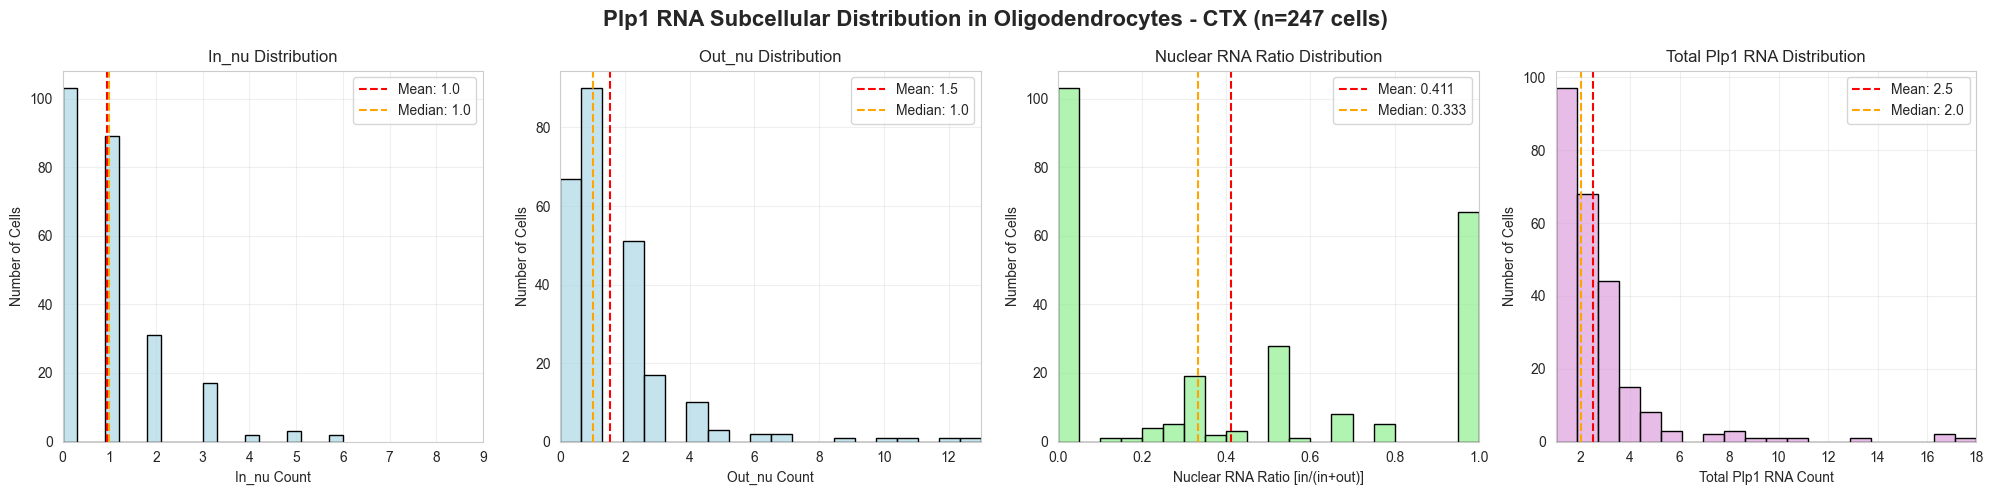


CTX Statistics:
  Number of cells: 247
  In_nu mean: 0.96
  Out_nu mean: 1.53
  Nuclear ratio mean: 0.411
  Total RNA mean: 2.49
------------------------------


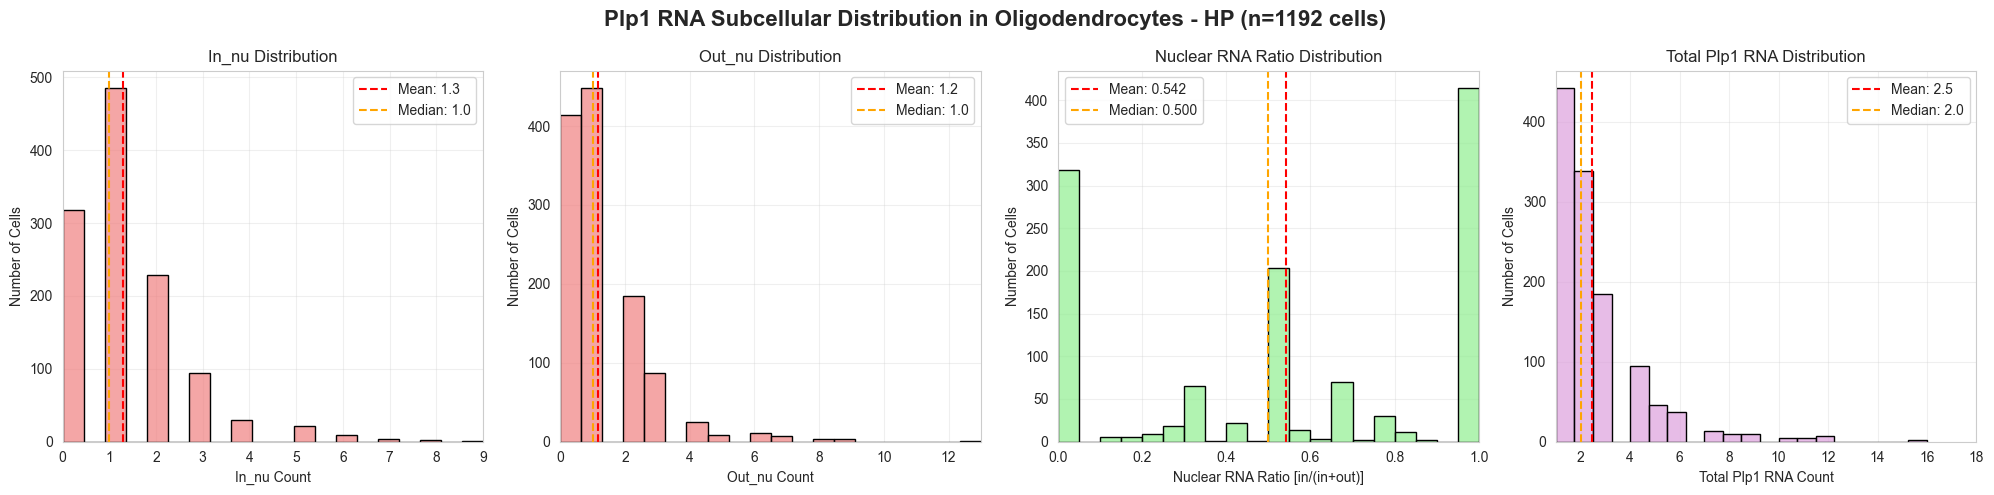


HP Statistics:
  Number of cells: 1192
  In_nu mean: 1.30
  Out_nu mean: 1.17
  Nuclear ratio mean: 0.542
  Total RNA mean: 2.48
------------------------------


In [37]:
# Plot histograms separated by run_id using seaborn
unique_run_ids = plp1_stats_df['run_id'].unique()
n_runs = len(unique_run_ids)

# Prepare data for seaborn
plot_data_hist = []
for _, row in plp1_stats_df.iterrows():
    run_name = row['run_id'].replace('20230704_PRISM3D_mousebrain_CTX_confocal', 'CTX')
    run_name = run_name.replace('20230710_PRISM3D_mousebrain_HP_confocal', 'HP')
    
    plot_data_hist.append({
        'Brain_Region': run_name,
        'In_nu_Count': row['in_nu_count'],
        'Out_nu_Count': row['out_nu_count'],
        'Total_Count': row['total_count'],
        'Nuclear_Ratio': row['in_nuclear_ratio'] if np.isfinite(row['in_nuclear_ratio']) else np.nan
    })

hist_df = pd.DataFrame(plot_data_hist)

# Calculate global ranges for consistent x-axis limits
in_nu_range = (hist_df['In_nu_Count'].min(), hist_df['In_nu_Count'].max())
out_nu_range = (hist_df['Out_nu_Count'].min(), hist_df['Out_nu_Count'].max())
total_range = (hist_df['Total_Count'].min(), hist_df['Total_Count'].max())
ratio_range = (hist_df['Nuclear_Ratio'].min(), hist_df['Nuclear_Ratio'].max())

print(f"Global ranges for consistent x-axis:")
print(f"  In_nu: {in_nu_range}")
print(f"  Out_nu: {out_nu_range}")
print(f"  Nuclear ratio: {ratio_range}")
print(f"  Total: {total_range}")
print()

# Create separate figures for each run_id
for run_name in ['CTX', 'HP']:
    # Filter data for current run_id
    current_data = hist_df[hist_df['Brain_Region'] == run_name]
    
    # Create 1x4 subplots
    fig, axes = plt.subplots(1, 4, figsize=(20, 5))
    
    fig.suptitle(f'Plp1 RNA Subcellular Distribution in Oligodendrocytes - {run_name} (n={len(current_data)} cells)', 
                 fontsize=16, fontweight='bold')
    
    # Define colors for this run_id
    color = 'lightblue' if run_name == 'CTX' else 'lightcoral'
    
    # 1. In_nu count histogram
    sns.histplot(data=current_data, x='In_nu_Count', bins=20, alpha=0.7, 
                 color=color, edgecolor='black', ax=axes[0])
    axes[0].set_xlabel('In_nu Count')
    axes[0].set_ylabel('Number of Cells')
    axes[0].set_title('In_nu Distribution')
    axes[0].grid(True, alpha=0.3)
    axes[0].set_xlim(in_nu_range)
    
    # Add statistics
    mean_in_nu = current_data['In_nu_Count'].mean()
    median_in_nu = current_data['In_nu_Count'].median()
    axes[0].axvline(mean_in_nu, color='red', linestyle='--', label=f'Mean: {mean_in_nu:.1f}')
    axes[0].axvline(median_in_nu, color='orange', linestyle='--', label=f'Median: {median_in_nu:.1f}')
    axes[0].legend()
    
    # 2. Out_nu count histogram
    sns.histplot(data=current_data, x='Out_nu_Count', bins=20, alpha=0.7, 
                 color=color, edgecolor='black', ax=axes[1])
    axes[1].set_xlabel('Out_nu Count')
    axes[1].set_ylabel('Number of Cells')
    axes[1].set_title('Out_nu Distribution')
    axes[1].grid(True, alpha=0.3)
    axes[1].set_xlim(out_nu_range)
    
    # Add statistics
    mean_out_nu = current_data['Out_nu_Count'].mean()
    median_out_nu = current_data['Out_nu_Count'].median()
    axes[1].axvline(mean_out_nu, color='red', linestyle='--', label=f'Mean: {mean_out_nu:.1f}')
    axes[1].axvline(median_out_nu, color='orange', linestyle='--', label=f'Median: {median_out_nu:.1f}')
    axes[1].legend()
    
    # 3. Nuclear ratio histogram (excluding NaN values)
    valid_data = current_data.dropna(subset=['Nuclear_Ratio'])
    if len(valid_data) > 0:
        sns.histplot(data=valid_data, x='Nuclear_Ratio', bins=20, alpha=0.7, 
                     color='lightgreen', edgecolor='black', ax=axes[2])
        axes[2].set_xlabel('Nuclear RNA Ratio [in/(in+out)]')
        axes[2].set_ylabel('Number of Cells')
        axes[2].set_title('Nuclear RNA Ratio Distribution')
        axes[2].grid(True, alpha=0.3)
        axes[2].set_xlim(ratio_range)
        
        # Add statistics
        mean_ratio = valid_data['Nuclear_Ratio'].mean()
        median_ratio = valid_data['Nuclear_Ratio'].median()
        axes[2].axvline(mean_ratio, color='red', linestyle='--', label=f'Mean: {mean_ratio:.3f}')
        axes[2].axvline(median_ratio, color='orange', linestyle='--', label=f'Median: {median_ratio:.3f}')
        axes[2].legend()
    else:
        axes[2].text(0.5, 0.5, 'No valid ratio data', ha='center', va='center', transform=axes[2].transAxes)
        axes[2].set_title('Nuclear RNA Ratio Distribution')
        axes[2].set_xlim(ratio_range)
    
    # 4. Total RNA count distribution
    sns.histplot(data=current_data, x='Total_Count', bins=20, alpha=0.7, 
                 color='plum', edgecolor='black', ax=axes[3])
    axes[3].set_xlabel('Total Plp1 RNA Count')
    axes[3].set_ylabel('Number of Cells')
    axes[3].set_title('Total Plp1 RNA Distribution')
    axes[3].grid(True, alpha=0.3)
    axes[3].set_xlim(total_range)
    
    # Add statistics
    mean_total = current_data['Total_Count'].mean()
    median_total = current_data['Total_Count'].median()
    axes[3].axvline(mean_total, color='red', linestyle='--', label=f'Mean: {mean_total:.1f}')
    axes[3].axvline(median_total, color='orange', linestyle='--', label=f'Median: {median_total:.1f}')
    axes[3].legend()
    
    plt.tight_layout()
    
    # Save individual figures
    plt.savefig(analysis_dir / f'plp1_subcellular_distribution_{run_name}.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    # Print statistics for this run_id
    print(f"\n{run_name} Statistics:")
    print(f"  Number of cells: {len(current_data)}")
    print(f"  In_nu mean: {mean_in_nu:.2f}")
    print(f"  Out_nu mean: {mean_out_nu:.2f}")
    if len(valid_data) > 0:
        print(f"  Nuclear ratio mean: {mean_ratio:.3f}")
    print(f"  Total RNA mean: {mean_total:.2f}")
    print("-" * 30)
